<a href="https://colab.research.google.com/github/rishulu/Hexart.In---AI-Center/blob/main/Stress_detection_using_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np # linear algebra
import pandas as pd

In [7]:
from google.colab import files
uploaded=files.upload()

Saving pillow.csv to pillow.csv


In [8]:
df = pd.read_csv('pillow.csv')
df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn import metrics

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [11]:
df.describe()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


In [12]:
df.shape

(630, 9)

In [13]:
df.isna().sum()

sr      0
rr      0
t       0
lm      0
bo      0
rem     0
sr.1    0
hr      0
sl      0
dtype: int64

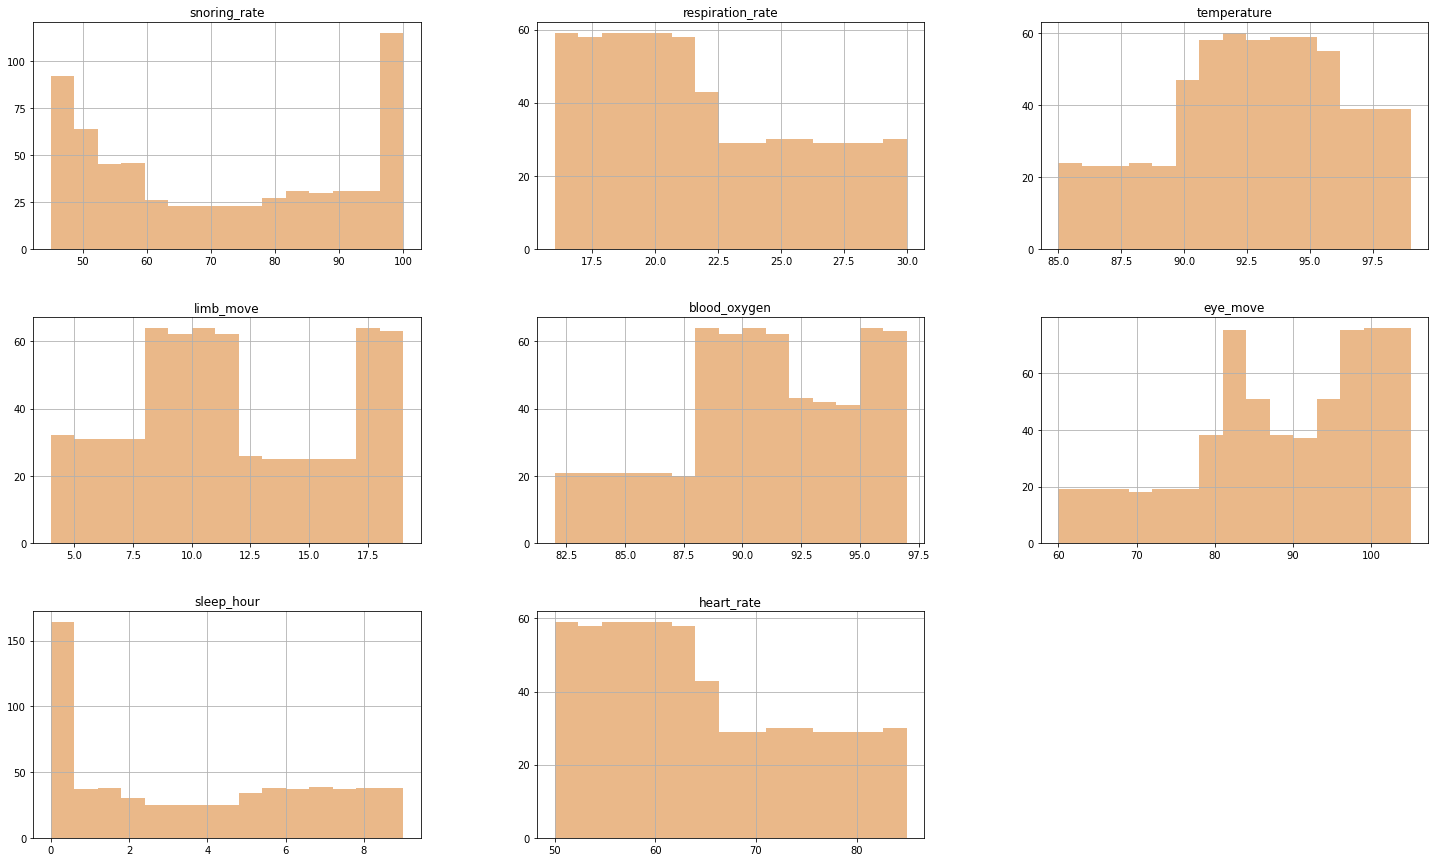

In [14]:
import matplotlib.pyplot as plt

df.columns = ['snoring_rate', 'respiration_rate', 'temperature', 'limb_move', 'blood_oxygen', 'eye_move', 'sleep_hour', 'heart_rate', 'stress_level']
color = '#eab889'
data = df.copy()
data.drop('stress_level', axis = 1, inplace = True)
data.hist(bins=15,figsize=(25,15),color=color)
plt.rcParams['font.size'] = 18
plt.show()

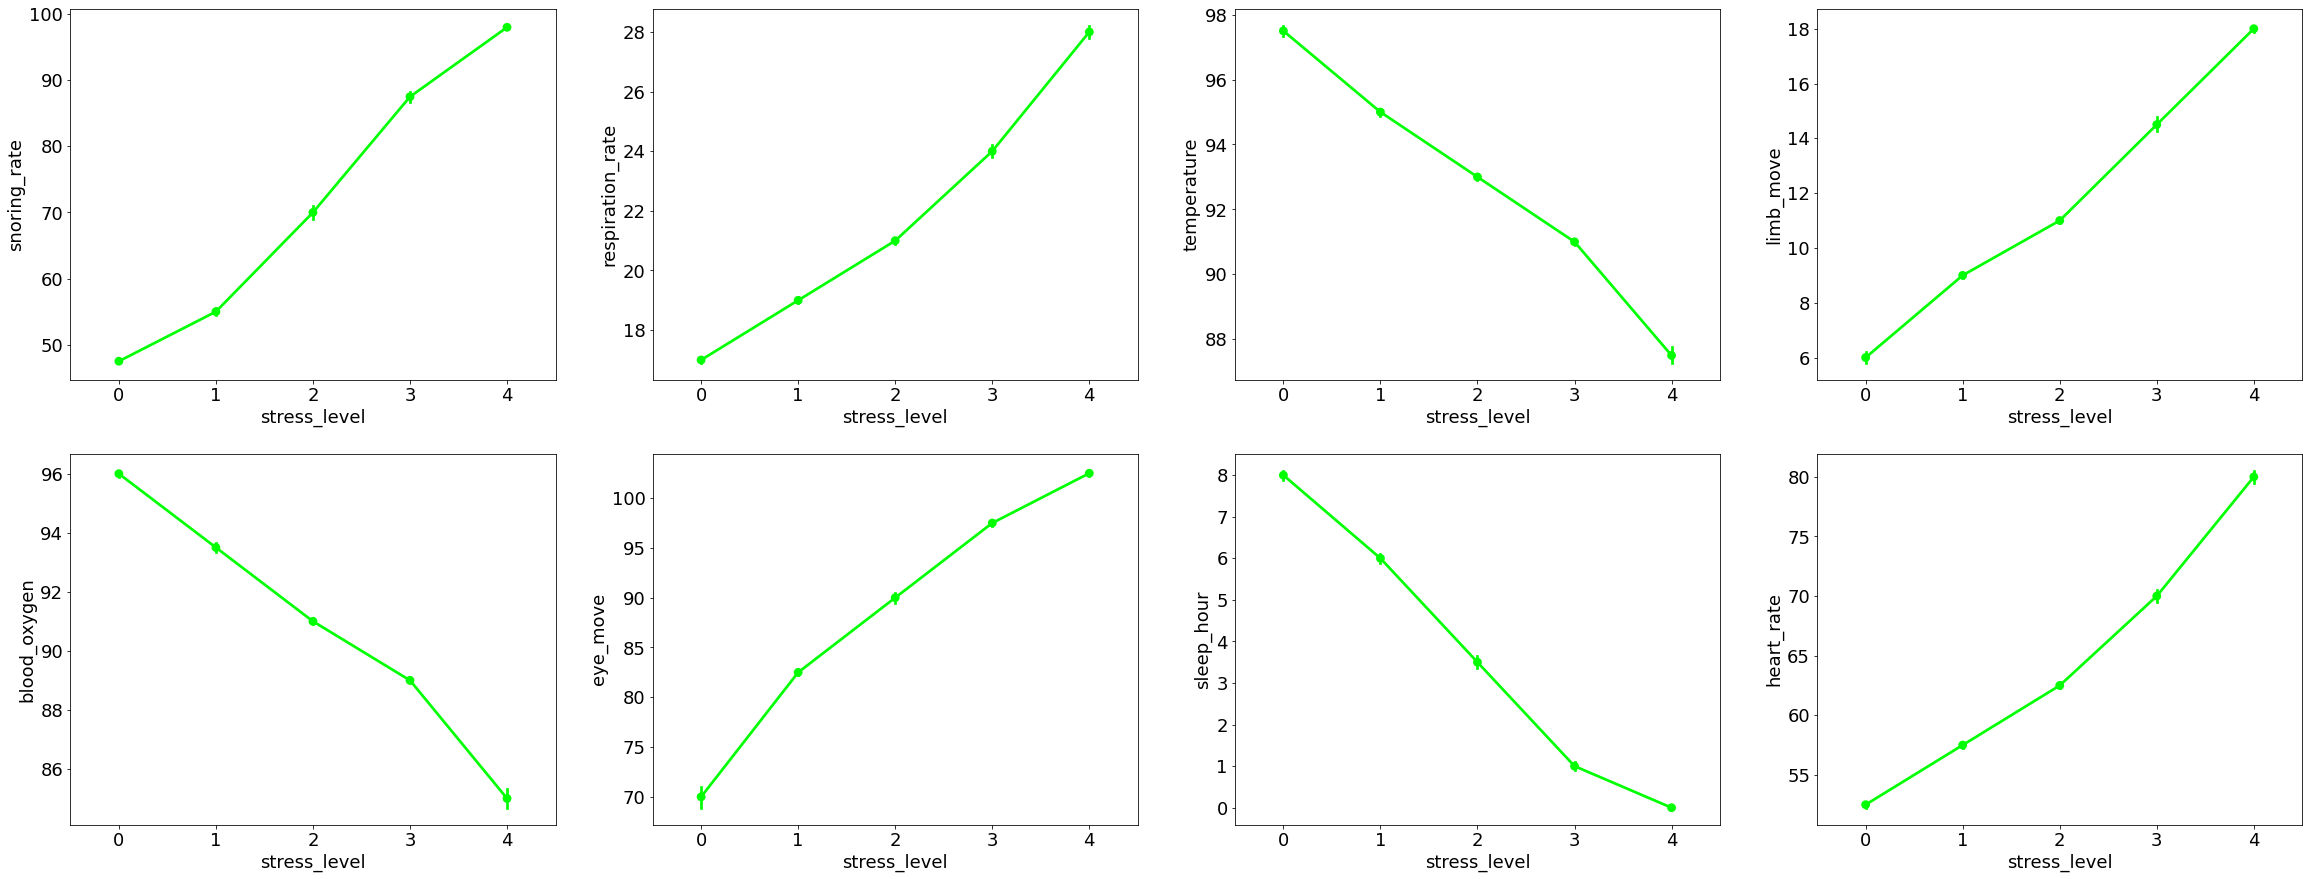

In [15]:
fig = plt.figure(figsize=(40, 15))
rows = 2
columns = 4
for i in range(len(df.columns[:-1])):
  fig.add_subplot(rows, columns, (i+1))
  img = sns.pointplot(x='stress_level',y=df.columns[i],data=df,color='lime',alpha=0.8)
plt.show()

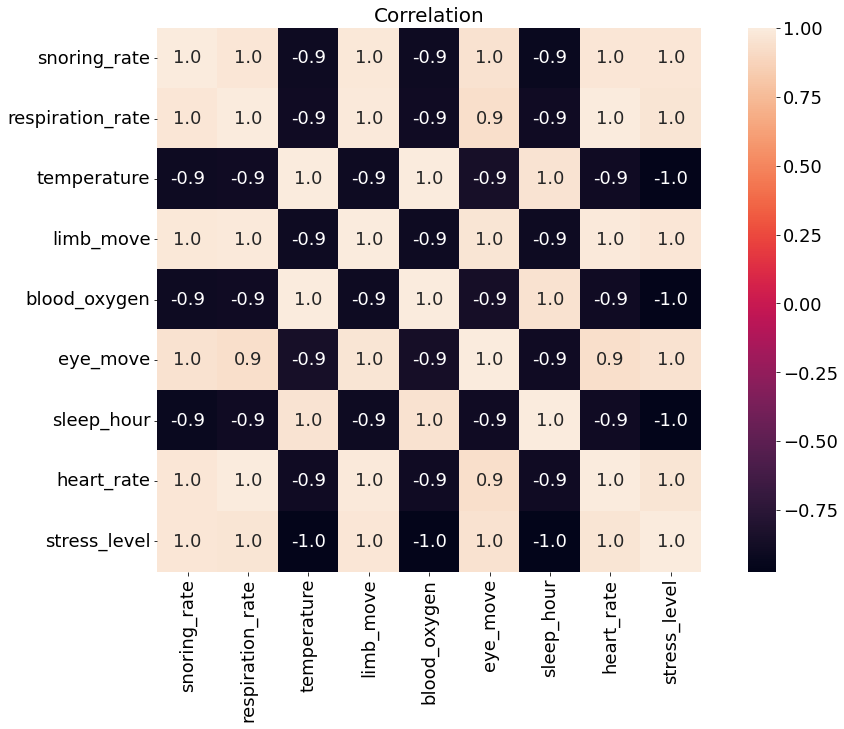

In [16]:
plt.figure(figsize = (17,10))
sns.heatmap(df.corr(), annot=True, square=True, fmt='.1f')
plt.title('Correlation', fontsize = 20)
plt.show()

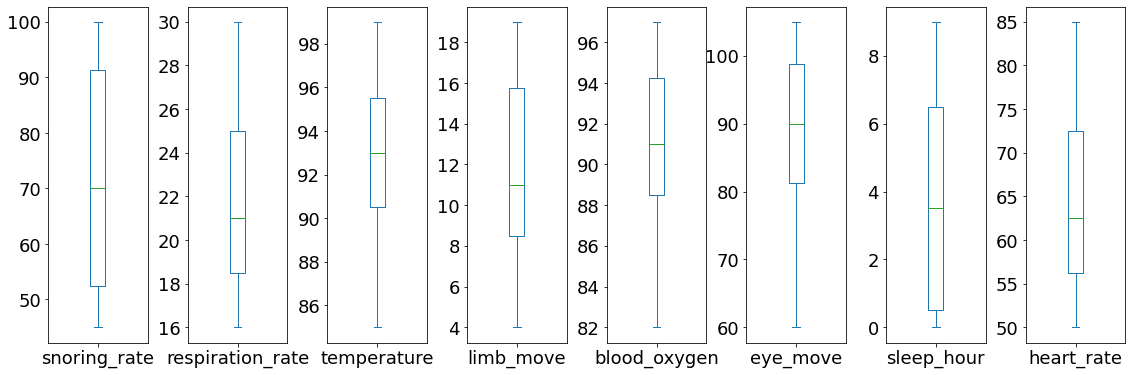

In [17]:
data.plot(kind='box', subplots=True, layout=(2,14),figsize=(14,14), sharex=False, sharey=False)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

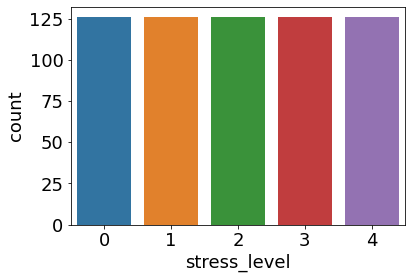

In [18]:
sns.countplot(x="stress_level", data =df)
plt.show()

In [20]:
#data preparation
x = df.copy();
x.drop('stress_level', axis = 1, inplace = True)
y = df['stress_level']

In [21]:
x = minmax_scale(x)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(x, y, test_size=.2,random_state =123)

In [24]:
# Showing data after pre processed
data_preprocessed = pd.DataFrame(x, columns = ['snoring_rate', 'respiration_rate', 'temperature', 'limb_move', 'blood_oxygen', 'eye_move', 'sleep_hour', 'heart_rate'])
data_preprocessed['stress_level'] = y
data_preprocessed.head()

,snoring_rate,respiration_rate,temperature,limb_move,blood_oxygen,eye_move,sleep_hour,heart_rate,stress_level
0,0.887273,0.691429,0.488571,0.840000,0.522667,0.880000,0.204444,0.691429,3
1,0.848000,0.650286,0.468000,0.792000,0.503467,0.864000,0.172444,0.650286,3
2,0.272727,0.285714,0.785714,0.400000,0.866667,0.555556,0.777778,0.285714,1
3,0.741091,0.538286,0.412000,0.661333,0.451200,0.820444,0.085333,0.538286,3
4,0.056727,0.089143,0.919429,0.166400,0.949867,0.277333,0.916444,0.089143,0


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [26]:
# Doing Cross Validation and find hyperparameter
from pandas.core.common import random_state
k = [5,10,15]
max_depth = [20, 40, 60]
for i in range(3):
    models = []
    models.append(('KNN', KNeighborsClassifier(n_neighbors=k[i])))
    models.append(('NB', GaussianNB()))
    models.append(('DT', DecisionTreeClassifier(max_depth=max_depth[i], random_state=101)))
    results = []
    names = []
    print("K:",k[i], "and max_depth:", max_depth[i])
    for name, model in models:
        kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    print("")

K: 5 and max_depth: 20
KNN: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
DT: 0.980198 (0.014002)

K: 10 and max_depth: 40
KNN: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
DT: 0.980198 (0.014002)

K: 15 and max_depth: 60
KNN: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
DT: 0.980198 (0.014002)



In [27]:
# Create K-NN Model
model_KNN = KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(X_train, y_train)
predict_KNN = model_KNN.predict(X_test)

In [28]:
# Create NB Model
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)
predict_NB = model_NB.predict(X_test)

In [29]:
# Create DT Model
model_DT = DecisionTreeClassifier(max_depth=40,random_state=101)
model_DT.fit(X_train, y_train)
predict_DT = model_DT.predict(X_test)

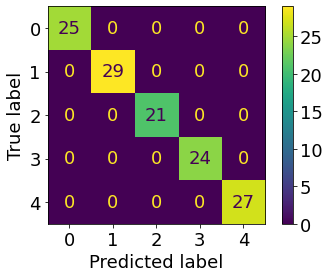

In [30]:
#knn
confusion_matrix = metrics.confusion_matrix(y_test, predict_KNN)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4])

cm_display.plot()
plt.show()

In [31]:
print(classification_report(y_test, predict_KNN))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        27

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



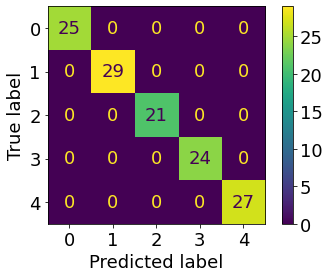

In [32]:
confusion_matrix = metrics.confusion_matrix(y_test, predict_NB)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4])

cm_display.plot()
plt.show()

In [33]:
print(classification_report(y_test, predict_NB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        27

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



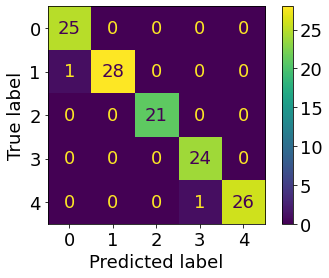

In [34]:
#decision tree
confusion_matrix = metrics.confusion_matrix(y_test, predict_DT)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4])

cm_display.plot()
plt.show()

In [35]:
print(classification_report(y_test, predict_DT))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.97      0.98        29
           2       1.00      1.00      1.00        21
           3       0.96      1.00      0.98        24
           4       1.00      0.96      0.98        27

    accuracy                           0.98       126
   macro avg       0.98      0.99      0.98       126
weighted avg       0.98      0.98      0.98       126

